In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.linear_model import LogisticRegression
% matplotlib inline
import scipy
from scipy.spatial.distance import pdist,cdist
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [0]:
df = pd.read_csv('iris.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
Id               152 non-null int64
SepalLengthCm    151 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     151 non-null float64
Species          152 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [0]:
df.dropna(inplace=True)

In [0]:
df.drop(columns=['Id'],inplace=True)

In [6]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [0]:
from sklearn.preprocessing import LabelEncoder
class_label_encoder = LabelEncoder()

df.iloc[:,-1] = class_label_encoder.fit_transform(df.iloc[:,-1])

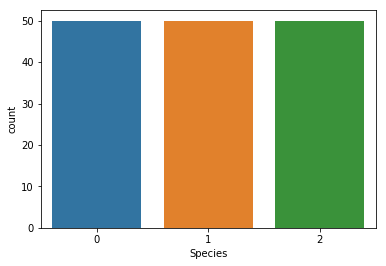

In [8]:
sns.countplot(x=df["Species"])

In [9]:
df.var()

SepalLengthCm    0.685694
SepalWidthCm     0.188004
PetalLengthCm    3.113179
PetalWidthCm     0.582414
Species          0.671141
dtype: float64

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


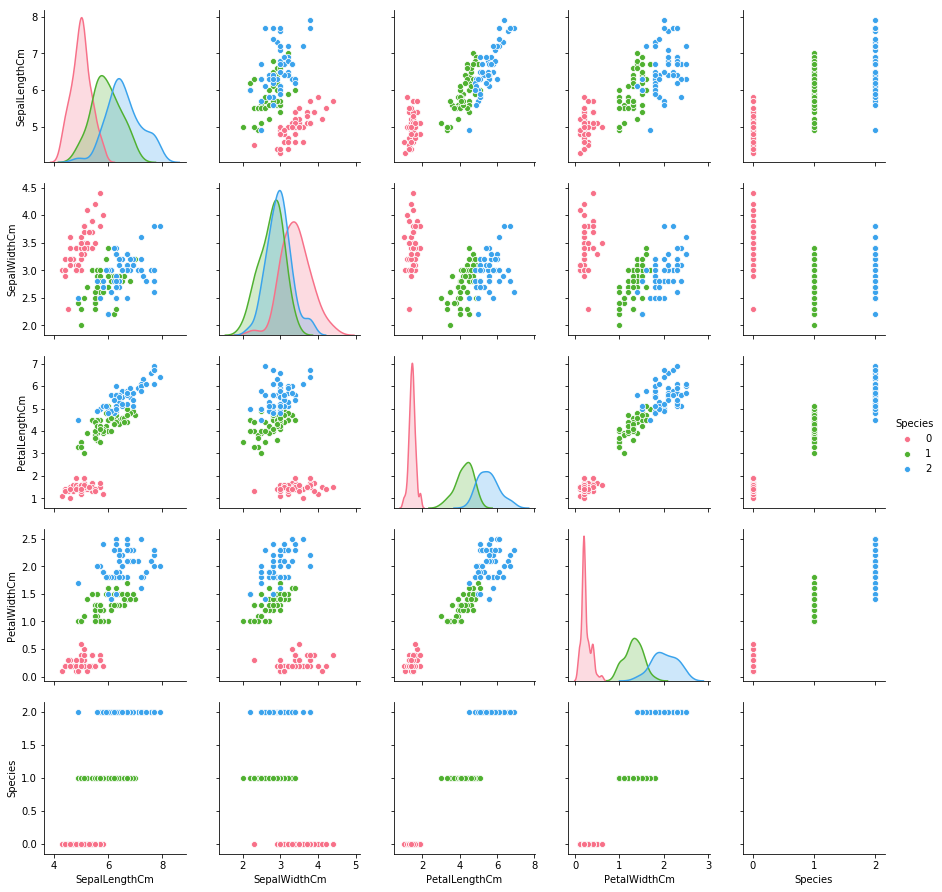

In [10]:
sns.pairplot(data=df,hue='Species',palette='husl')

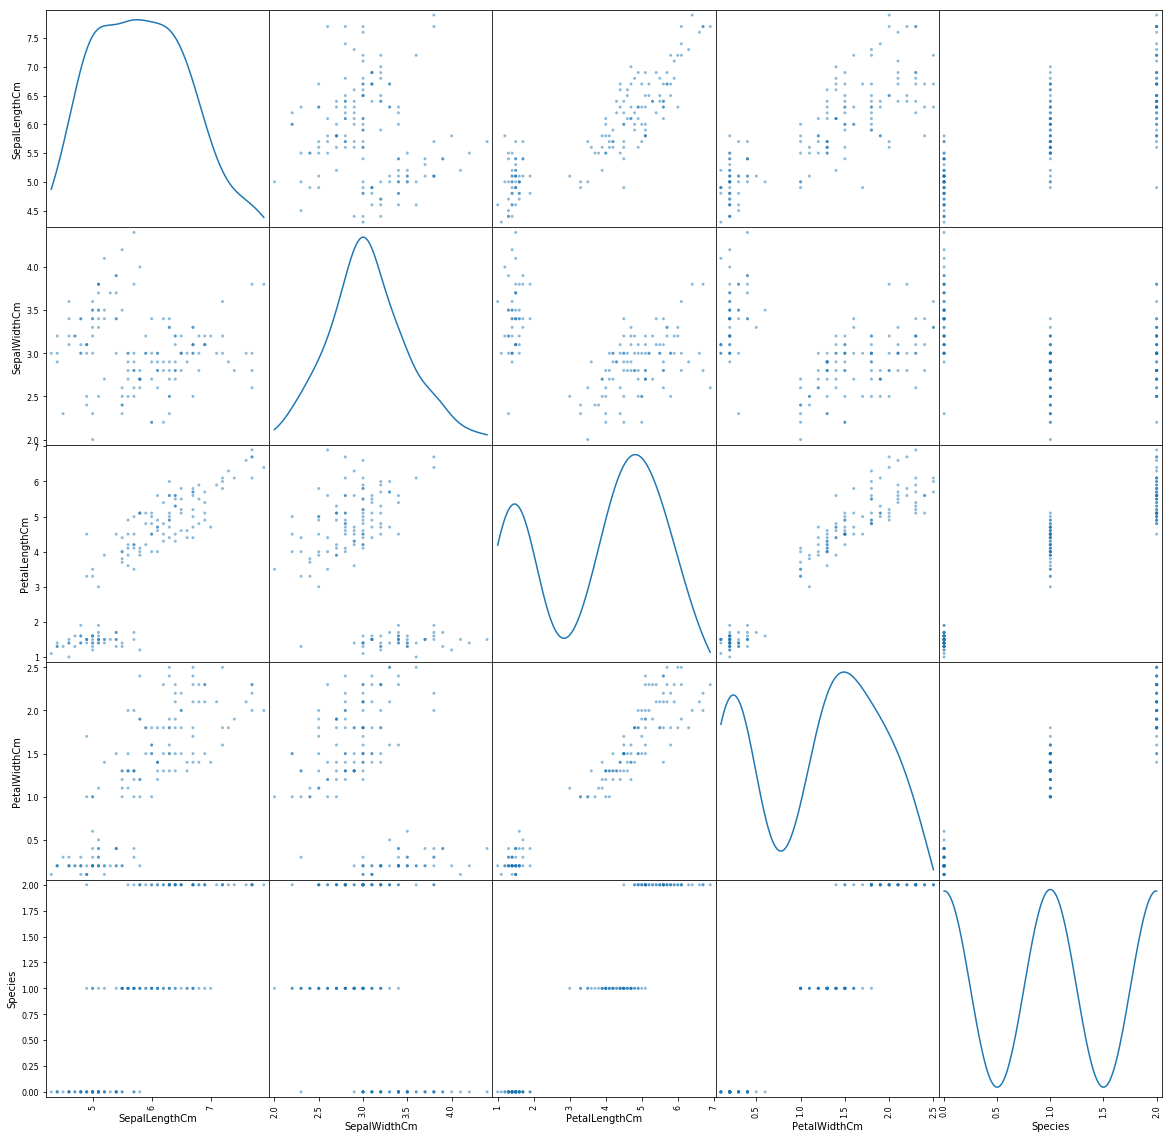

In [11]:
spd = pd.plotting.scatter_matrix(df, figsize=(20,20), diagonal="kde")

In [0]:
Model = []
Accuracy = []

# **Classification**

In [0]:
X = df.drop(columns=['Species'])

In [0]:
Y = df.Species

In [0]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [0]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [0]:
LR = LogisticRegression(solver='lbfgs',multi_class='auto')
LR.fit(x_train,y_train)
y_pred = LR.predict(x_test)

In [0]:
Model.append('Logistic Regression')
Accuracy.append(accuracy_score(y_test,y_pred))

In [19]:
params = {
    
    'n_neighbors': range(1,25),
    'weights': ['uniform','distance'],
    'algorithm': ['ball_tree','kd_tree','brute','auto'],
    'p': [1,2,3]
}

knn = KNeighborsClassifier()

gs = GridSearchCV(estimator=knn,n_jobs=-1,cv=5,param_grid=params)
gs.fit(X,Y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'],
                         'n_neighbors': range(1, 25), 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [20]:
gs.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 6, 'p': 2, 'weights': 'uniform'}

In [0]:
knn = KNeighborsClassifier(**gs.best_params_)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

In [0]:
Model.append('KNN')
Accuracy.append(accuracy_score(y_test,y_pred))

In [0]:
nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred = nb.predict(x_test)

In [0]:
Model.append('Naive')
Accuracy.append(accuracy_score(y_test,y_pred))

In [25]:
params = {
    
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':range(1,10,1),
    'max_leaf_nodes':range(2,10,1),
    'max_features':['auto','log2']
    
}

dt = DecisionTreeClassifier()

gs = GridSearchCV(estimator=dt,n_jobs=-1,cv=3,param_grid=params)
gs.fit(X,Y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'm

In [26]:
gs.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'log2',
 'max_leaf_nodes': 9,
 'splitter': 'best'}

In [0]:
dt = DecisionTreeClassifier(**gs.best_params_)
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)

In [0]:
Model.append('Decision Tree')
Accuracy.append(accuracy_score(y_test,y_pred))

In [29]:
params = {
    
    'n_estimators':range(10,100,10),
    'criterion':['gini','entropy'],
    'max_depth':range(2,10,1),
    'max_leaf_nodes':range(2,10,1),
    'max_features':['auto','log2']
    
}

rf = RandomForestClassifier()

gs = GridSearchCV(estimator=rf,param_grid=params,cv=3)
gs.fit(X,Y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [30]:
gs.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'log2',
 'max_leaf_nodes': 2,
 'n_estimators': 70}

In [0]:
rf = RandomForestClassifier(**gs.best_params_)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

In [0]:
Model.append('Random Forrest')
Accuracy.append(accuracy_score(y_test,y_pred))

In [0]:
gb_Boost = GradientBoostingClassifier(n_estimators=100,learning_rate=0.01)
gb_Boost.fit(x_train,y_train)
y_pred = rf.predict(x_test)

In [0]:
Model.append('Gradient Boosting')
Accuracy.append(accuracy_score(y_test,y_pred))

In [0]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.fit_transform(x_test)

In [36]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_scaled, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
y_pred = svc.predict(X_test_scaled)
Model.append('SVC')
Accuracy.append(accuracy_score(y_test,y_pred))

# **Clustering**

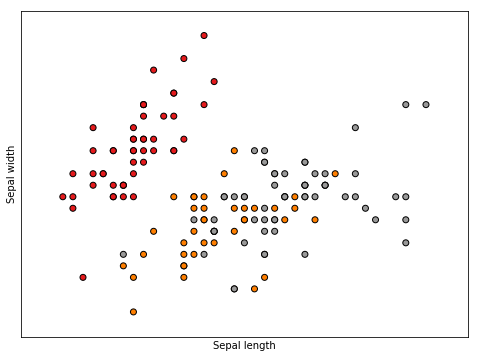

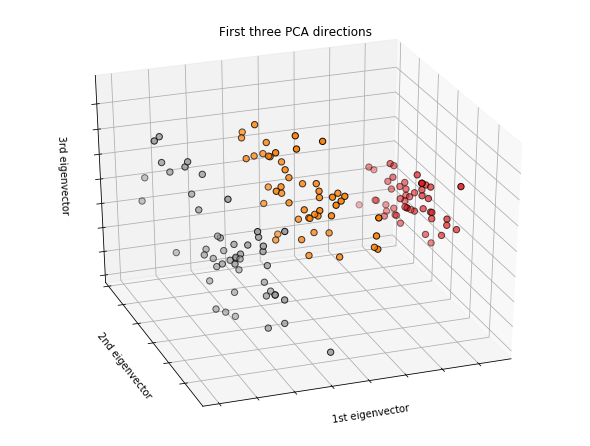

In [38]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

## plot frame size
plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points (scatter plot, all rows first and second column only)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')


## plotting the axes with ticks
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(df)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [39]:
cluster_range = range(1,15)
cluster_errors = []

for r in cluster_range:
  clusters = KMeans( r,n_init = 15, random_state=2)
  clusters.fit(X)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,600.000000
1,2,223.732006
2,3,140.965817
3,4,114.429708
4,5,91.191970
5,6,80.204334
6,7,72.409561
7,8,63.795006
8,9,54.812011
9,10,47.608553


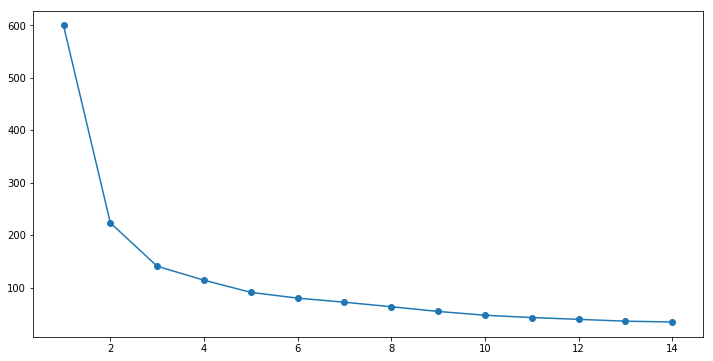

In [40]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [0]:
from scipy.stats import zscore
df_scaled = pd.DataFrame(X).apply(zscore)

In [0]:
x_train,x_test,y_train,y_test = train_test_split(df_scaled,Y,test_size=0.2,random_state=2)

kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2)
kmeans.fit(x_train)
centroids=kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(x_train) )

In [0]:
y_pred = kmeans.predict(x_test)

In [0]:
Model.append('Kmeans')
Accuracy.append(accuracy_score(y_test,y_pred))

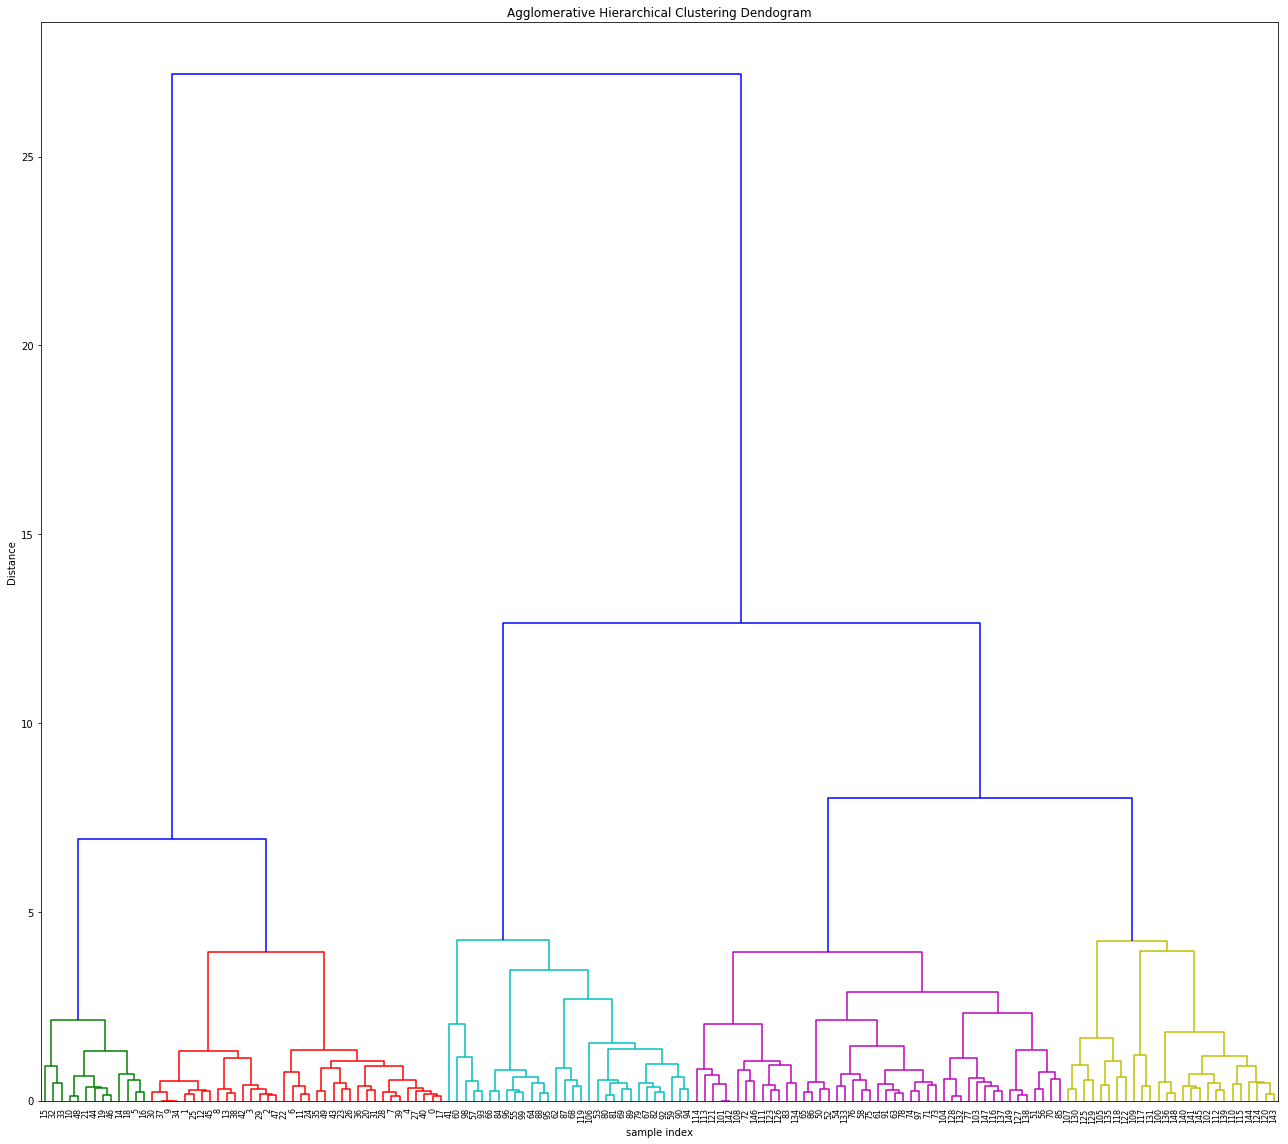

In [46]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(df_scaled, 'ward')
dendrogram(Z,leaf_rotation=90.0,color_threshold=5,
           leaf_font_size=8)
plt.tight_layout()

In [45]:
result = pd.DataFrame({'Model':Model,'Accuracy':Accuracy})
result

,Model,Accuracy
0,Logistic Regression,0.966667
1,KNN,1.000000
2,Naive,0.966667
3,Decision Tree,0.966667
4,Random Forrest,0.966667
5,Gradient Boosting,0.966667
6,SVC,0.933333
7,Kmeans,0.566667
